Twitter Sentiment Analysis on crypto currencies


In [1]:
#Importing all the essential libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tweepy
#All the tweets are cleaned and the extracted as csv file and the further cleaning data processing and modelling building are done in here
! pip install vaderSentiment
from time import sleep
import json
import io
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
from sklearn import preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.1 MB/s 


In [3]:
#Importing the extracted data from the twitter as csv
eth_df = pd.read_csv("/content/drive/MyDrive/Dabi_Project/Ethereum_data_24_08.csv")

In [ ]:
#Viewing the dataframe
eth_df

,Unnamed: 0,User,tweets,likes,time,retweets
0,0,@VitalikButerin,@lexfridman 😛\n\nhttps://t.co/JP1Ucky8h6,442,2022-08-23 20:58:21,21
1,1,@VitalikButerin,If I had to make a bear case for Anglo civiliz...,2378,2022-08-23 15:23:31,250
2,2,@VitalikButerin,RT @VitalikButerin: @thefaketomato @palladiumm...,0,2022-08-23 15:18:40,50
3,3,@VitalikButerin,"@thefaketomato @palladiummag ""X sounds great, ...",367,2022-08-23 15:16:45,50
4,4,@VitalikButerin,@Max_Stirn @palladiummag Many kinds of technol...,15,2022-08-23 13:56:50,3
...,...,...,...,...,...,...
29329,29329,@Cyber_FM,Welcome 2021! https://t.co/jS8vCVRX5S GET PAID...,0,2021-02-22 14:30:35,0
29330,29330,@Cyber_FM,Positivity for 2021 from https://t.co/jS8vCVRX...,1,2021-02-22 14:30:34,0
29331,29331,@Cyber_FM,Ahora sonando en CyberFM Latino: Manantial de ...,1,2021-02-22 14:26:24,0
29332,29332,@Cyber_FM,An amazing 2021 w/ https://t.co/jS8vCVRX5S GET...,1,2021-02-22 14:20:27,0


In [4]:
eth_df1 = eth_df.drop(eth_df.columns[0], axis=1, inplace=True)

In [5]:
#Looking for the info of time column
eth_df['time'] = pd.to_datetime(eth_df['time'])

In [6]:
eth_df.info()
eth_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29334 entries, 0 to 29333
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User      29334 non-null  object        
 1   tweets    29334 non-null  object        
 2   likes     29334 non-null  int64         
 3   time      29334 non-null  datetime64[ns]
 4   retweets  29334 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ MB


,User,tweets,likes,time,retweets
0,@VitalikButerin,@lexfridman 😛\n\nhttps://t.co/JP1Ucky8h6,442,2022-08-23 20:58:21,21
1,@VitalikButerin,If I had to make a bear case for Anglo civiliz...,2378,2022-08-23 15:23:31,250
2,@VitalikButerin,RT @VitalikButerin: @thefaketomato @palladiumm...,0,2022-08-23 15:18:40,50
3,@VitalikButerin,"@thefaketomato @palladiummag ""X sounds great, ...",367,2022-08-23 15:16:45,50
4,@VitalikButerin,@Max_Stirn @palladiummag Many kinds of technol...,15,2022-08-23 13:56:50,3
...,...,...,...,...,...
29329,@Cyber_FM,Welcome 2021! https://t.co/jS8vCVRX5S GET PAID...,0,2021-02-22 14:30:35,0
29330,@Cyber_FM,Positivity for 2021 from https://t.co/jS8vCVRX...,1,2021-02-22 14:30:34,0
29331,@Cyber_FM,Ahora sonando en CyberFM Latino: Manantial de ...,1,2021-02-22 14:26:24,0
29332,@Cyber_FM,An amazing 2021 w/ https://t.co/jS8vCVRX5S GET...,1,2021-02-22 14:20:27,0


In [7]:
#Extract date from the time column
eth_df['Date']= eth_df['time'].dt.date

Cleaning the Tweets 

In [8]:
#Cleaning the tweets 
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lm = WordNetLemmatizer()

#Defining a funciton for cleaning the tweets.
def cleaning(tweets_data):
    #for removing the hashtags of the tweets
    tweets_without_hashtag = re.sub(r'#\w+', ' ', tweets_data)

    #remove the urls of the tweets
    tweet_without_url = re.sub(r'http\S+',' ', tweets_without_hashtag)

    #Remove mentions and characters that not in the English alphabets
    tweets_without_mentions = re.sub(r'@\w+',' ', tweets_without_hashtag)
    first_cleaned_tweets = re.sub('[^A-Za-z]+', ' ', tweets_without_mentions)
   
 
    #Tokenize the tweets
    tweet_tokens = TweetTokenizer().tokenize(first_cleaned_tweets)

    #Remove the Punctuations
    tokens_without_punctuations = [w for w in tweet_tokens if w.isalpha()]

    #Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punctuations if t not in stop_words]


    #lemmatize the tweets
    text_cleaned = [lm.lemmatize(t) for t in tokens_without_sw]

    #Joining the tweets after cleaning 
    return " ".join(text_cleaned)

In [9]:
eth_df

,User,tweets,likes,time,retweets,Date
0,@VitalikButerin,@lexfridman 😛\n\nhttps://t.co/JP1Ucky8h6,442,2022-08-23 20:58:21,21,2022-08-23
1,@VitalikButerin,If I had to make a bear case for Anglo civiliz...,2378,2022-08-23 15:23:31,250,2022-08-23
2,@VitalikButerin,RT @VitalikButerin: @thefaketomato @palladiumm...,0,2022-08-23 15:18:40,50,2022-08-23
3,@VitalikButerin,"@thefaketomato @palladiummag ""X sounds great, ...",367,2022-08-23 15:16:45,50,2022-08-23
4,@VitalikButerin,@Max_Stirn @palladiummag Many kinds of technol...,15,2022-08-23 13:56:50,3,2022-08-23
...,...,...,...,...,...,...
29329,@Cyber_FM,Welcome 2021! https://t.co/jS8vCVRX5S GET PAID...,0,2021-02-22 14:30:35,0,2021-02-22
29330,@Cyber_FM,Positivity for 2021 from https://t.co/jS8vCVRX...,1,2021-02-22 14:30:34,0,2021-02-22
29331,@Cyber_FM,Ahora sonando en CyberFM Latino: Manantial de ...,1,2021-02-22 14:26:24,0,2021-02-22
29332,@Cyber_FM,An amazing 2021 w/ https://t.co/jS8vCVRX5S GET...,1,2021-02-22 14:20:27,0,2021-02-22


In [10]:
#Further Cleaning for tweets
# Import nltk package and download the stopwords
import nltk 
nltk.download('stopwords')
# We filter out the english language stopwrds
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#Converting all the tweets into string 
eth_df['tweets']=eth_df['tweets'].apply(str)

In [12]:
#Imoporting the nltk library
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
import re
eth_df.tweets = eth_df.tweets.apply(lambda x: cleaning(x))
eth_df

,User,tweets,likes,time,retweets,Date
0,@VitalikButerin,http co JP Ucky h,442,2022-08-23 20:58:21,21,2022-08-23
1,@VitalikButerin,If I make bear case Anglo civilization would P...,2378,2022-08-23 15:23:31,250,2022-08-23
2,@VitalikButerin,RT X sound great mandatory X sound horrifying ...,0,2022-08-23 15:18:40,50,2022-08-23
3,@VitalikButerin,X sound great mandatory X sound horrifying man...,367,2022-08-23 15:16:45,50,2022-08-23
4,@VitalikButerin,Many kind technology benefit rich people le po...,15,2022-08-23 13:56:50,3,2022-08-23
...,...,...,...,...,...,...
29329,@Cyber_FM,Welcome http co jS vCVRX S GET PAID listening ...,0,2021-02-22 14:30:35,0,2021-02-22
29330,@Cyber_FM,Positivity http co jS vCVRX S GET PAID listeni...,1,2021-02-22 14:30:34,0,2021-02-22
29331,@Cyber_FM,Ahora sonando en CyberFM Latino Manantial de K...,1,2021-02-22 14:26:24,0,2021-02-22
29332,@Cyber_FM,An amazing w http co jS vCVRX S GET PAID liste...,1,2021-02-22 14:20:27,0,2021-02-22


In [14]:
eth_df1 = eth_df.copy()

Cleaning the data based on the ethereum search terms 

In [15]:
#Collecting all the data related to the ethereum search terms 
eth_df2 = eth_df1[(eth_df1['tweets'].str.contains(r'ETH(?!$)')) | (eth_df1['tweets'].str.contains(r'eth(?!$)')) | (eth_df1['tweets'].str.contains(r'Eth(?!$)'))]

In [16]:
eth_df2

,User,tweets,likes,time,retweets,Date
5,@VitalikButerin,In ultra immersive fancy metaverse VR land guy...,6,2022-08-23 13:53:38,0,2022-08-23
18,@VitalikButerin,Actually phrase anti civilization moral critic...,4,2022-08-20 21:44:45,1,2022-08-20
30,@VitalikButerin,None principle literally infinite weight alway...,33,2022-08-20 18:35:58,0,2022-08-20
47,@VitalikButerin,I argue moral perspective N copy agent impleme...,18,2022-08-19 14:35:44,0,2022-08-19
63,@VitalikButerin,Glad see Ethereum people pushing regulation pr...,3530,2022-08-17 23:43:17,533,2022-08-17
...,...,...,...,...,...,...
29009,@Cyber_FM,Welcoming http co jS vCVRX S GET PAID listenin...,0,2021-02-24 09:15:02,0,2021-02-24
29010,@Cyber_FM,Positivity http co jS vCVRX S GET PAID listeni...,0,2021-02-24 08:47:03,0,2021-02-24
29132,@Cyber_FM,Welcoming http co jS vCVRX S GET PAID listenin...,0,2021-02-23 16:50:41,0,2021-02-23
29214,@Cyber_FM,Positivity http co jS vCVRX S GET PAID listeni...,1,2021-02-23 05:19:25,0,2021-02-23


In [17]:
#Tweets about every users related to the ethereum
users = eth_df2['User'].value_counts()
users

@CoinFees           2237
@ethereum           1486
@Ekpenyongodusu     1404
@InsiderEthereum     486
@cburniske           278
@CamiRusso           261
@diiorioanthony      170
@JBSchweitzer        113
@rogerkver            71
@Cyber_FM             37
@VitalikButerin       24
Name: User, dtype: int64

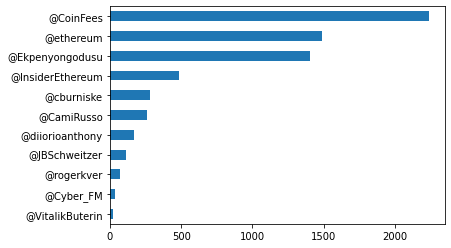

In [18]:
#ax = eth_df2.plot.bar(x='User', y=users , rot=0)
#The distribution of tweet counts based on influencers
eth_df2.User.value_counts().sort_values().plot(kind = 'barh')

In [19]:
#Sort values by date
eth_df2.sort_values(by='Date', ascending = False, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
#Printed the dataframe after sorting
eth_df2

,User,tweets,likes,time,retweets,Date
5,@VitalikButerin,In ultra immersive fancy metaverse VR land guy...,6,2022-08-23 13:53:38,0,2022-08-23
14187,@CamiRusso,DeFi liquidation volume v ETH price time gt ha...,61,2022-08-23 13:36:44,12,2022-08-23
20601,@InsiderEthereum,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2022-08-23 11:18:20,2,2022-08-23
20598,@InsiderEthereum,Bitcoin Ethereum future exerting dominance spo...,2,2022-08-23 11:18:20,0,2022-08-23
20597,@InsiderEthereum,Bitfinex offer new chain split token ahead Eth...,2,2022-08-23 15:18:19,0,2022-08-23
...,...,...,...,...,...,...
3402,@rogerkver,Bitcoin going happen whether regulator want ha...,8,2013-07-31 01:34:03,10,2013-07-31
3437,@rogerkver,http co kKww NTiEj new user day k user altoget...,1,2013-07-04 12:58:36,4,2013-07-04
3464,@rogerkver,If opposed government inflating money pay war ...,3,2013-06-11 16:04:06,11,2013-06-11
3537,@rogerkver,http co nhGgiRGK CEO say thinking accepting Bi...,0,2013-04-24 22:36:33,6,2013-04-24


In [21]:
#Removing all the tweets with 0 likes
eth_df3 = eth_df2[eth_df2['likes'] != 0]
eth_df3

,User,tweets,likes,time,retweets,Date
5,@VitalikButerin,In ultra immersive fancy metaverse VR land guy...,6,2022-08-23 13:53:38,0,2022-08-23
14187,@CamiRusso,DeFi liquidation volume v ETH price time gt ha...,61,2022-08-23 13:36:44,12,2022-08-23
20601,@InsiderEthereum,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2022-08-23 11:18:20,2,2022-08-23
20598,@InsiderEthereum,Bitcoin Ethereum future exerting dominance spo...,2,2022-08-23 11:18:20,0,2022-08-23
20597,@InsiderEthereum,Bitfinex offer new chain split token ahead Eth...,2,2022-08-23 15:18:19,0,2022-08-23
...,...,...,...,...,...,...
3387,@rogerkver,I would rather sit tub full pig feces smoke me...,3,2013-08-18 08:00:06,4,2013-08-18
3396,@rogerkver,I paid bank USD conversion fee wasted hour ban...,3,2013-08-14 04:39:43,14,2013-08-14
3402,@rogerkver,Bitcoin going happen whether regulator want ha...,8,2013-07-31 01:34:03,10,2013-07-31
3437,@rogerkver,http co kKww NTiEj new user day k user altoget...,1,2013-07-04 12:58:36,4,2013-07-04


In [22]:
eth_df3['retweets'].value_counts()

0      1466
1       457
2        85
3        48
8        48
       ... 
72        1
99        1
73        1
128       1
221       1
Name: retweets, Length: 164, dtype: int64

In [25]:
#Removing all the tweets with 0 retweets
eth_df4 = eth_df3[eth_df3['retweets'] != 0]
eth_df4

,User,tweets,likes,time,retweets,Date
14187,@CamiRusso,DeFi liquidation volume v ETH price time gt ha...,61,2022-08-23 13:36:44,12,2022-08-23
20601,@InsiderEthereum,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2022-08-23 11:18:20,2,2022-08-23
20629,@InsiderEthereum,Price analysis BTC ETH BNB XRP ADA SOL DOGE DO...,2,2022-08-20 03:18:19,1,2022-08-20
18,@VitalikButerin,Actually phrase anti civilization moral critic...,4,2022-08-20 21:44:45,1,2022-08-20
10983,@cburniske,Cobble lot people together around valuable res...,22,2022-08-18 22:52:46,4,2022-08-18
...,...,...,...,...,...,...
3387,@rogerkver,I would rather sit tub full pig feces smoke me...,3,2013-08-18 08:00:06,4,2013-08-18
3396,@rogerkver,I paid bank USD conversion fee wasted hour ban...,3,2013-08-14 04:39:43,14,2013-08-14
3402,@rogerkver,Bitcoin going happen whether regulator want ha...,8,2013-07-31 01:34:03,10,2013-07-31
3437,@rogerkver,http co kKww NTiEj new user day k user altoget...,1,2013-07-04 12:58:36,4,2013-07-04


In [267]:
eth_df4 = eth_df3.copy()

Close price analysis and prediction of Ethereum 

In [147]:
#Importing the current market values inline with the tweets
close_eth = pd.read_csv("/content/drive/MyDrive/Dabi_Project/ETH-USD_24.csv")
close_eth_full = pd.read_csv("/content/drive/MyDrive/Dabi_Project/ETH-USD.csv")


In [27]:
close_eth_full1 = close_eth_full.copy()

In [28]:
close_eth_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [29]:
#Sort by date
close_eth.sort_values(by='Date', ascending = False, inplace=True)
close_eth

,Date,Close
1513,31-12-2021,3682.632813
1148,31-12-2020,737.803406
782,31-12-2019,129.610855
417,31-12-2018,133.368256
52,31-12-2017,756.732971
...,...,...
1514,01-01-2022,3769.697021
1149,01-01-2021,730.367554
783,01-01-2020,130.802002
418,01-01-2019,140.819412


In [30]:
#Converting the date column into date time
close_eth['Date'] = pd.to_datetime(close_eth['Date'])

In [31]:
close_eth_full.reset_index()
close_eth_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [32]:
close_eth_full = close_eth_full.drop(['Date', "Adj Close"], axis = 1)
close_eth_full.head()

,Open,High,Low,Close,Volume
0,308.644989,329.451996,307.056000,320.884003,893249984
1,320.670990,324.717987,294.541992,299.252991,885985984
2,298.585999,319.453003,298.191986,314.681000,842300992
3,314.690002,319.153015,298.513000,307.907990,1613479936
4,307.024994,328.415009,307.024994,316.716003,1041889984


In [33]:
#Sort by date
close_eth.sort_values(by='Date', ascending = False, inplace=True)
close_eth

,Date,Close
1737,2022-12-08,1957.246460
1706,2022-12-07,1038.191650
1676,2022-12-06,1445.216553
1645,2022-12-05,1961.701538
1615,2022-12-04,3030.376465
...,...,...
26,2017-05-12,463.281006
25,2017-04-12,470.204010
24,2017-03-12,465.852997
23,2017-02-12,463.449005


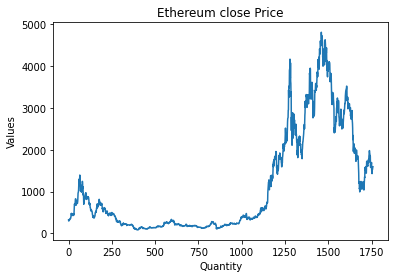

In [34]:
plt.plot(close_eth_full.Close)
plt.title('Ethereum close Price')
plt.xlabel('Quantity')
plt.ylabel('Values')
plt.show()

In [35]:
#Creating the moving averages for next 100 days
ma100 = close_eth_full.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1754    1522.001680
1755    1516.808367
1756    1512.623398
1757    1508.695338
1758    1505.211369
Name: Close, Length: 1759, dtype: float64

Text(0.5, 1.0, '100 days moving averages')

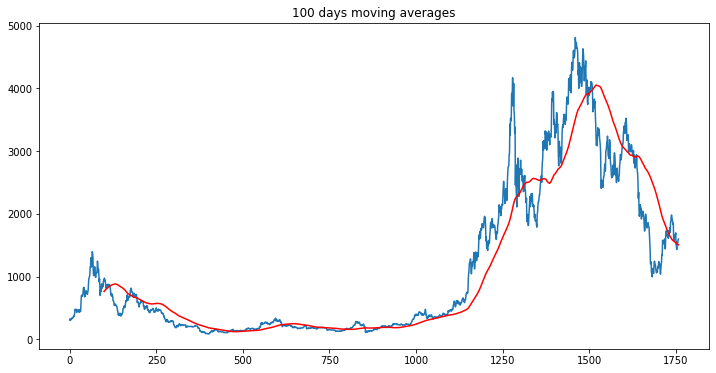

In [36]:
plt.figure(figsize = (12,6))
plt.plot(close_eth_full.Close)
plt.plot(ma100, 'r')
plt.title('100 days moving averages')

In [37]:
#Creating the 200 days moving averages
ma200 = close_eth_full.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1754    2168.118309
1755    2161.100586
1756    2154.282196
1757    2147.795763
1758    2141.110523
Name: Close, Length: 1759, dtype: float64

Text(0.5, 1.0, '100 and 200 days moving averages')

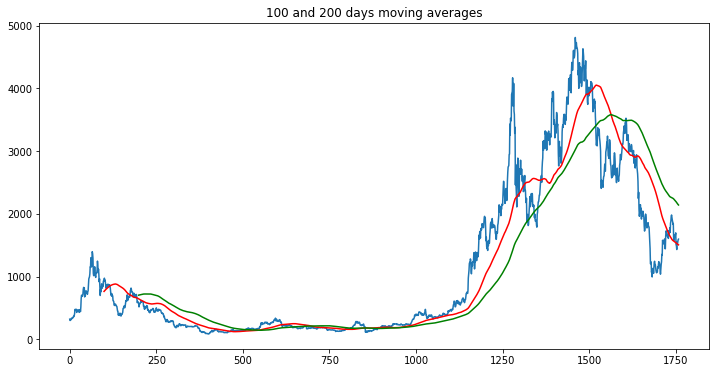

In [38]:
plt.figure(figsize = (12,6))
plt.plot(close_eth_full.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('100 and 200 days moving averages')

In [39]:
close_eth_full1['Date'] = pd.to_datetime(close_eth_full1['Date'], format='%Y-%m-%d')
year_2021 = close_eth_full1.loc[(close_eth_full1['Date'] >= '2021-01-01')
                     & (close_eth_full1['Date'] < '2022-01-01')]
year_2021.drop(year_2021[['Open']],axis=1)
months_2021 = year_2021.groupby(year_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
months_2021 = round(months_2021.reindex(month_order, axis=0),2)
months_2021 = months_2021.reset_index()

In [40]:
#Taking only the 2021 data of ethereum
year_2021

,Date,Open,High,Low,Close,Adj Close,Volume
1149,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
1150,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
1151,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
1152,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
1153,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781
...,...,...,...,...,...,...,...
1509,2021-12-27,4064.746338,4126.001465,4033.492432,4037.547607,4037.547607,11424360002
1510,2021-12-28,4037.538086,4037.538086,3769.280029,3800.893066,3800.893066,17299472803
1511,2021-12-29,3797.436279,3827.981934,3612.795898,3628.531738,3628.531738,15722555672
1512,2021-12-30,3632.219727,3767.559814,3595.204834,3713.852051,3713.852051,12925377999


In [41]:
#Monthly Average Open & Close Price - Year 2021
import plotly.express as px
fig = px.bar(months_2021, x='Date', y=['Open','Close'], barmode='group', title = 'Monthly Average Open & Close Price - Year 2021')
fig.show()

In [42]:
#Printing Ethereum price over period by date
fig = px.line(close_eth_full1, x="Date", y="Close", title='Ethereum Close price over time')
fig.show()

Model building for Ethereum price

In [43]:
#Spliting data to training and testing
data_training = pd.DataFrame(close_eth_full['Close'][0:int(len(close_eth_full)*0.70)])
data_testing = pd.DataFrame(close_eth_full['Close'][int(len(close_eth_full)*0.70): int(len(close_eth_full))])
print(data_training.shape)
print(data_testing.shape)

(1231, 1)
(528, 1)


In [44]:
#Printing the splited data
print(data_training)
print(data_testing)

            Close
0      320.884003
1      299.252991
2      314.681000
3      307.907990
4      316.716003
...           ...
1226  1817.624146
1227  1812.634644
1228  1788.217041
1229  1691.333984
1230  1678.650146

[1231 rows x 1 columns]
            Close
1231  1593.413452
1232  1595.359253
1233  1702.842041
1234  1716.494629
1235  1691.355957
...           ...
1754  1553.037354
1755  1523.838867
1756  1553.684937
1757  1586.176758
1758  1596.431030

[528 rows x 1 columns]


In [45]:
#For data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [46]:
#After scaling the data
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.1261161 ],
       [0.11458483],
       [0.12280934],
       ...,
       [0.9083364 ],
       [0.85668903],
       [0.84992741]])

In [47]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#x_train.shape
print(y_train.shape)

(1131,)


In [48]:
#Importing  model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.add(Dense(units = 1))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [51]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
36/36 [==============================] - 16s 286ms/step - loss: 0.0226
Epoch 2/50
36/36 [==============================] - 11s 293ms/step - loss: 0.0076
Epoch 3/50
36/36 [==============================] - 10s 284ms/step - loss: 0.0053
Epoch 4/50
36/36 [==============================] - 10s 280ms/step - loss: 0.0056
Epoch 5/50
36/36 [==============================] - 10s 284ms/step - loss: 0.0046
Epoch 6/50
36/36 [==============================] - 12s 327ms/step - loss: 0.0061
Epoch 7/50
36/36 [==============================] - 10s 288ms/step - loss: 0.0042
Epoch 8/50
36/36 [==============================] - 11s 297ms/step - loss: 0.0040
Epoch 9/50
36/36 [==============================] - 10s 290ms/step - loss: 0.0036
Epoch 10/50
36/36 [==============================] - 10s 284ms/step - loss: 0.0039
Epoch 11/50
36/36 [==============================] - 10s 278ms/step - loss: 0.0039
Epoch 12/50
36/36 [==============================] - 10s 288ms/step - loss: 0.0039
Epoch 13/50
3

In [52]:
#Saved the model after model building
model.save('keras_model.h5')

In [53]:
data_testing.head()

,Close
1231,1593.413452
1232,1595.359253
1233,1702.842041
1234,1716.494629
1235,1691.355957


In [54]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)

In [55]:
final_df

,Close
0,586.011169
1,589.355591
2,636.181824
3,642.868958
4,654.811951
...,...
623,1553.037354
624,1523.838867
625,1553.684937
626,1586.176758


In [56]:
input_data = scaler.fit_transform(final_df)

In [57]:
input_data

array([[5.43133046e-04],
       [1.33408081e-03],
       [1.24083723e-02],
       [1.39898634e-02],
       [1.68143525e-02],
       [1.78752718e-02],
       [1.29071479e-02],
       [6.17336082e-03],
       [1.20943894e-02],
       [0.00000000e+00],
       [6.59652763e-03],
       [1.00975264e-02],
       [1.23265420e-02],
       [2.33961712e-02],
       [3.46901151e-02],
       [3.49556553e-02],
       [3.97089769e-02],
       [3.64416321e-02],
       [3.46830710e-02],
       [4.51285594e-02],
       [9.26581237e-02],
       [1.07965511e-01],
       [1.22101699e-01],
       [1.47432029e-01],
       [1.51822824e-01],
       [1.51472582e-01],
       [1.64924595e-01],
       [1.60471211e-01],
       [1.19769663e-01],
       [1.08722667e-01],
       [1.29370045e-01],
       [1.50114106e-01],
       [1.39088965e-01],
       [1.53681576e-01],
       [1.52885678e-01],
       [1.59296489e-01],
       [1.87680069e-01],
       [1.88857389e-01],
       [1.27201727e-01],
       [1.54385064e-01],


In [58]:
input_data.shape

(628, 1)

In [59]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [60]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(528, 100, 1)
(528,)


In [61]:
#Predict the model 
y_predicted = model.predict(x_test)
y_predicted.shape

(528, 1)

In [62]:
y_predicted.shape

(528, 1)

In [63]:
y_predicted

array([[0.25822362],
       [0.24924417],
       [0.2404028 ],
       [0.23225513],
       [0.22551546],
       [0.2206924 ],
       [0.2189073 ],
       [0.22130498],
       [0.2290799 ],
       [0.2427576 ],
       [0.26290828],
       [0.28723824],
       [0.3128699 ],
       [0.33699346],
       [0.35720968],
       [0.3704797 ],
       [0.37652808],
       [0.37622792],
       [0.3716259 ],
       [0.3649522 ],
       [0.35775784],
       [0.35262328],
       [0.35263908],
       [0.35992792],
       [0.37318796],
       [0.38851172],
       [0.4009694 ],
       [0.40681762],
       [0.4064088 ],
       [0.4018473 ],
       [0.3957891 ],
       [0.3898874 ],
       [0.38352478],
       [0.3770756 ],
       [0.37341446],
       [0.3760134 ],
       [0.38700497],
       [0.40572917],
       [0.4295485 ],
       [0.4566455 ],
       [0.48465705],
       [0.515204  ],
       [0.5467473 ],
       [0.5790502 ],
       [0.61004657],
       [0.6370712 ],
       [0.66215664],
       [0.686

In [64]:
scaler.scale_

array([0.0002365])

In [65]:
scale_factor = 1/0.0002365
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

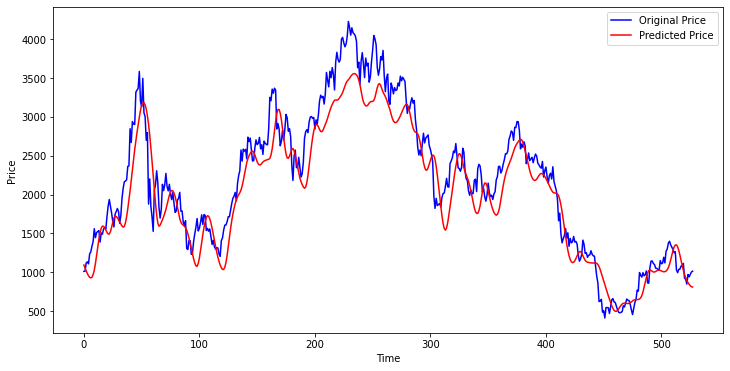

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
close_eth2 = pd.read_csv("/content/drive/MyDrive/Dabi_Project/ETH-USD_2015_with_diff.csv")

In [68]:
close_eth2

,Date,Open,Close,Price_diff
0,09-11-2017,308.644989,320.884003,-12.239014
1,10-11-2017,320.670990,299.252991,21.417999
2,11-11-2017,298.585999,314.681000,-16.095001
3,12-11-2017,314.690002,307.907990,6.782012
4,13-11-2017,307.024994,316.716003,-9.691009
...,...,...,...,...
1750,25-08-2022,1657.336548,1696.457031,-39.120483
1751,26-08-2022,1696.324585,1507.782837,188.541748
1752,27-08-2022,1508.156982,1491.395020,16.761962
1753,28-08-2022,1491.206787,1430.547363,60.659424


In [69]:
#Converting the date column into date time
close_eth2['Date'] = pd.to_datetime(close_eth2['Date'])

In [70]:
close_eth2.sort_values(by='Date', ascending = False, inplace=True)
close_eth2

,Date,Open,Close,Price_diff
1737,2022-12-08,1880.899170,1957.246460,-76.347290
1706,2022-12-07,1097.259155,1038.191650,59.067505
1676,2022-12-06,1530.189697,1445.216553,84.973144
1645,2022-12-05,2072.504639,1961.701538,110.803101
1615,2022-12-04,2981.420654,3030.376465,-48.955811
...,...,...,...,...
26,2017-05-12,470.294006,463.281006,7.013000
25,2017-04-12,466.053986,470.204010,-4.150024
24,2017-03-12,463.704987,465.852997,-2.148010
23,2017-02-12,466.851013,463.449005,3.402008


In [148]:
eth_df5 = eth_df4.copy()

In [149]:
#Joining the market value closed price inline with the tweets
eth_df5 = eth_df5.set_index('Date').join(close_eth2.set_index('Date'))
eth_df5

,User,tweets,likes,time,retweets,Open,Close,Price_diff
Date,,,,,,,,
2013-06-11,@rogerkver,If opposed government inflating money pay war ...,3,2013-06-11 16:04:06,11,NaN,NaN,NaN
2013-07-04,@rogerkver,http co kKww NTiEj new user day k user altoget...,1,2013-07-04 12:58:36,4,NaN,NaN,NaN
2013-07-31,@rogerkver,Bitcoin going happen whether regulator want ha...,8,2013-07-31 01:34:03,10,NaN,NaN,NaN
2013-08-14,@rogerkver,I paid bank USD conversion fee wasted hour ban...,3,2013-08-14 04:39:43,14,NaN,NaN,NaN
2013-08-18,@rogerkver,I would rather sit tub full pig feces smoke me...,3,2013-08-18 08:00:06,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-08-23,@VitalikButerin,In ultra immersive fancy metaverse VR land guy...,6,2022-08-23 13:53:38,0,1622.939331,1662.769897,-39.830566
2022-08-23,@CamiRusso,DeFi liquidation volume v ETH price time gt ha...,61,2022-08-23 13:36:44,12,1622.939331,1662.769897,-39.830566
2022-08-23,@InsiderEthereum,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2022-08-23 11:18:20,2,1622.939331,1662.769897,-39.830566


In [150]:
eth_df6 = eth_df5.dropna()
eth_df6

,User,tweets,likes,time,retweets,Open,Close,Price_diff
Date,,,,,,,,
2017-04-12,@ethereum,Developer Update Ethereum Core Developers Meet...,89,2017-04-12 08:03:13,35,466.053986,470.204010,-4.150024
2017-11-12,@rogerkver,Vitalik genius class act That I sold portion B...,1643,2017-11-12 16:13:03,464,440.358002,515.135986,-74.777984
2017-11-17,@ethereum,LIVE Ethereum Core Devs Meeting http co OK bka...,126,2017-11-17 13:59:51,68,330.166992,332.394012,-2.227020
2017-11-17,@ethereum,Notes Ethereum Core Devs Meeting http co qgpgw...,198,2017-11-17 22:28:09,96,330.166992,332.394012,-2.227020
2017-12-15,@ethereum,LIVE Ethereum Core Devs Meeting http co sKGBGK...,239,2017-12-15 13:50:05,135,696.375977,684.447998,11.927979
...,...,...,...,...,...,...,...,...
2022-08-23,@VitalikButerin,In ultra immersive fancy metaverse VR land guy...,6,2022-08-23 13:53:38,0,1622.939331,1662.769897,-39.830566
2022-08-23,@CamiRusso,DeFi liquidation volume v ETH price time gt ha...,61,2022-08-23 13:36:44,12,1622.939331,1662.769897,-39.830566
2022-08-23,@InsiderEthereum,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2022-08-23 11:18:20,2,1622.939331,1662.769897,-39.830566


In [151]:
eth_df6.reset_index(inplace = True)
eth_df6

,Date,User,tweets,likes,time,retweets,Open,Close,Price_diff
0,2017-04-12,@ethereum,Developer Update Ethereum Core Developers Meet...,89,2017-04-12 08:03:13,35,466.053986,470.204010,-4.150024
1,2017-11-12,@rogerkver,Vitalik genius class act That I sold portion B...,1643,2017-11-12 16:13:03,464,440.358002,515.135986,-74.777984
2,2017-11-17,@ethereum,LIVE Ethereum Core Devs Meeting http co OK bka...,126,2017-11-17 13:59:51,68,330.166992,332.394012,-2.227020
3,2017-11-17,@ethereum,Notes Ethereum Core Devs Meeting http co qgpgw...,198,2017-11-17 22:28:09,96,330.166992,332.394012,-2.227020
4,2017-12-15,@ethereum,LIVE Ethereum Core Devs Meeting http co sKGBGK...,239,2017-12-15 13:50:05,135,696.375977,684.447998,11.927979
...,...,...,...,...,...,...,...,...,...
2234,2022-08-23,@VitalikButerin,In ultra immersive fancy metaverse VR land guy...,6,2022-08-23 13:53:38,0,1622.939331,1662.769897,-39.830566
2235,2022-08-23,@CamiRusso,DeFi liquidation volume v ETH price time gt ha...,61,2022-08-23 13:36:44,12,1622.939331,1662.769897,-39.830566
2236,2022-08-23,@InsiderEthereum,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2022-08-23 11:18:20,2,1622.939331,1662.769897,-39.830566
2237,2022-08-23,@InsiderEthereum,Bitcoin Ethereum future exerting dominance spo...,2,2022-08-23 11:18:20,0,1622.939331,1662.769897,-39.830566


In [152]:
column_names2 = ['User', "Date", "tweets", "likes", 'retweets', 'Close', 'Price_diff']

eth_df7 = eth_df6.reindex(columns=column_names2)
eth_df7

,User,Date,tweets,likes,retweets,Close,Price_diff
0,@ethereum,2017-04-12,Developer Update Ethereum Core Developers Meet...,89,35,470.204010,-4.150024
1,@rogerkver,2017-11-12,Vitalik genius class act That I sold portion B...,1643,464,515.135986,-74.777984
2,@ethereum,2017-11-17,LIVE Ethereum Core Devs Meeting http co OK bka...,126,68,332.394012,-2.227020
3,@ethereum,2017-11-17,Notes Ethereum Core Devs Meeting http co qgpgw...,198,96,332.394012,-2.227020
4,@ethereum,2017-12-15,LIVE Ethereum Core Devs Meeting http co sKGBGK...,239,135,684.447998,11.927979
...,...,...,...,...,...,...,...
2234,@VitalikButerin,2022-08-23,In ultra immersive fancy metaverse VR land guy...,6,0,1662.769897,-39.830566
2235,@CamiRusso,2022-08-23,DeFi liquidation volume v ETH price time gt ha...,61,12,1662.769897,-39.830566
2236,@InsiderEthereum,2022-08-23,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2,1662.769897,-39.830566
2237,@InsiderEthereum,2022-08-23,Bitcoin Ethereum future exerting dominance spo...,2,0,1662.769897,-39.830566


In [153]:
#eth_df8['Percentage_change'] = eth_df8.loc['Price_change']/
eth_df7['Percent']=eth_df7[['Price_diff']].div(eth_df7.Close, axis=0)*100

In [154]:
eth_df7

,User,Date,tweets,likes,retweets,Close,Price_diff,Percent
0,@ethereum,2017-04-12,Developer Update Ethereum Core Developers Meet...,89,35,470.204010,-4.150024,-0.882601
1,@rogerkver,2017-11-12,Vitalik genius class act That I sold portion B...,1643,464,515.135986,-74.777984,-14.516164
2,@ethereum,2017-11-17,LIVE Ethereum Core Devs Meeting http co OK bka...,126,68,332.394012,-2.227020,-0.669994
3,@ethereum,2017-11-17,Notes Ethereum Core Devs Meeting http co qgpgw...,198,96,332.394012,-2.227020,-0.669994
4,@ethereum,2017-12-15,LIVE Ethereum Core Devs Meeting http co sKGBGK...,239,135,684.447998,11.927979,1.742715
...,...,...,...,...,...,...,...,...
2234,@VitalikButerin,2022-08-23,In ultra immersive fancy metaverse VR land guy...,6,0,1662.769897,-39.830566,-2.395435
2235,@CamiRusso,2022-08-23,DeFi liquidation volume v ETH price time gt ha...,61,12,1662.769897,-39.830566,-2.395435
2236,@InsiderEthereum,2022-08-23,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2,1662.769897,-39.830566,-2.395435
2237,@InsiderEthereum,2022-08-23,Bitcoin Ethereum future exerting dominance spo...,2,0,1662.769897,-39.830566,-2.395435


In [155]:
eth_df7.sort_values(by='Date', ascending=False, inplace=True)
eth_df7

,User,Date,tweets,likes,retweets,Close,Price_diff,Percent
2238,@InsiderEthereum,2022-08-23,Bitfinex offer new chain split token ahead Eth...,2,0,1662.769897,-39.830566,-2.395435
2237,@InsiderEthereum,2022-08-23,Bitcoin Ethereum future exerting dominance spo...,2,0,1662.769897,-39.830566,-2.395435
2236,@InsiderEthereum,2022-08-23,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2,1662.769897,-39.830566,-2.395435
2235,@CamiRusso,2022-08-23,DeFi liquidation volume v ETH price time gt ha...,61,12,1662.769897,-39.830566,-2.395435
2234,@VitalikButerin,2022-08-23,In ultra immersive fancy metaverse VR land guy...,6,0,1662.769897,-39.830566,-2.395435
...,...,...,...,...,...,...,...,...
5,@ethereum,2017-12-15,Come watch Ethereum Core Developer Meeting hou...,274,111,684.447998,11.927979,1.742715
2,@ethereum,2017-11-17,LIVE Ethereum Core Devs Meeting http co OK bka...,126,68,332.394012,-2.227020,-0.669994
3,@ethereum,2017-11-17,Notes Ethereum Core Devs Meeting http co qgpgw...,198,96,332.394012,-2.227020,-0.669994
1,@rogerkver,2017-11-12,Vitalik genius class act That I sold portion B...,1643,464,515.135986,-74.777984,-14.516164


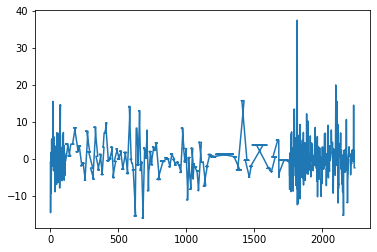

In [156]:
import matplotlib.pyplot as plt
eth_df7['Percent'].plot()
plt.show()

In [157]:
eth_df7['Percent'].min()

-15.926066865510649

In [158]:
eth_df7['Percent'].max()

37.468436697261644

In [270]:
for index, row in eth_df7.iterrows():
    if eth_df7.loc[index, 'Percent'] < -0.25:
        eth_df7.loc[index,'Impact'] = 'Negative Impact'
    elif eth_df7.loc[index, 'Percent'] >= -0.25 and eth_df7.loc[index, 'Percent'] <= 2 :
        eth_df7.loc[index,'Impact'] = 'Neutral Impact'
    else:
      eth_df7.loc[index, 'Impact'] = 'Positive Impact'
eth_df7.head()

,User,Date,tweets,likes,retweets,Close,Price_diff,Percent,Impact,Subjectivity,Polarity,Sentiment
2238,@InsiderEthereum,2022-08-23,Bitfinex offer new chain split token ahead Eth...,2,0,1662.769897,-39.830566,-2.395435,Negative Impact,0.454545,0.136364,Positive
2235,@CamiRusso,2022-08-23,DeFi liquidation volume v ETH price time gt ha...,61,12,1662.769897,-39.830566,-2.395435,Negative Impact,0.541667,-0.291667,Negative
2234,@VitalikButerin,2022-08-23,In ultra immersive fancy metaverse VR land guy...,6,0,1662.769897,-39.830566,-2.395435,Negative Impact,0.485714,-0.042857,Negative
2237,@InsiderEthereum,2022-08-23,Bitcoin Ethereum future exerting dominance spo...,2,0,1662.769897,-39.830566,-2.395435,Negative Impact,0.125000,0.000000,Neutral
2236,@InsiderEthereum,2022-08-23,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2,1662.769897,-39.830566,-2.395435,Negative Impact,0.333333,0.333333,Positive


In [265]:
eth_df7.Impact.value_counts()

Negative    985
Positive    643
Neutral     611
Name: Impact, dtype: int64

In [161]:
from textblob import TextBlob

Getting polarity and Subjectivity

In [163]:
#function for subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Add teo column as subjectivity and Polarity
eth_df7['Subjectivity'] = eth_df7['tweets'].apply(getSubjectivity)
eth_df7['Polarity'] = eth_df7['tweets'].apply(getPolarity)

#show the data
eth_df7.tail(10)

,User,Date,tweets,likes,retweets,Close,Price_diff,Percent,Impact,Subjectivity,Polarity
9,@ethereum,2018-01-22,Developer Update Ethereum Core Developers Meet...,428,156,1003.260010,52.089966,5.192070,Positive,0.000000,0.000000
8,@diiorioanthony,2018-01-18,year ago month Miami I brought together team T...,72,6,1036.280029,-19.840027,-1.914543,Negative,0.333333,0.250000
7,@rogerkver,2017-12-29,The current version Bitcoin Cash easily handle...,1778,469,753.591980,-13.203003,-1.752009,Negative,0.616667,0.216667
6,@ethereum,2017-12-18,Developer Update Ethereum Core Developers Meet...,354,137,794.645020,-72.913025,-9.175547,Negative,0.000000,0.000000
4,@ethereum,2017-12-15,LIVE Ethereum Core Devs Meeting http co sKGBGK...,239,135,684.447998,11.927979,1.742715,Neutral,0.500000,0.136364
5,@ethereum,2017-12-15,Come watch Ethereum Core Developer Meeting hou...,274,111,684.447998,11.927979,1.742715,Neutral,0.500000,0.136364
2,@ethereum,2017-11-17,LIVE Ethereum Core Devs Meeting http co OK bka...,126,68,332.394012,-2.227020,-0.669994,Negative,0.500000,0.318182
3,@ethereum,2017-11-17,Notes Ethereum Core Devs Meeting http co qgpgw...,198,96,332.394012,-2.227020,-0.669994,Negative,0.000000,0.000000
1,@rogerkver,2017-11-12,Vitalik genius class act That I sold portion B...,1643,464,515.135986,-74.777984,-14.516164,Negative,0.000000,0.000000
0,@ethereum,2017-04-12,Developer Update Ethereum Core Developers Meet...,89,35,470.204010,-4.150024,-0.882601,Negative,0.000000,0.000000


In [164]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [166]:
# Create a column to store the text sentiment
eth_df7['Sentiment'] = eth_df7['Polarity'].apply(getSentiment)

eth_df7.tail(10)

,User,Date,tweets,likes,retweets,Close,Price_diff,Percent,Impact,Subjectivity,Polarity,Sentiment
9,@ethereum,2018-01-22,Developer Update Ethereum Core Developers Meet...,428,156,1003.260010,52.089966,5.192070,Positive,0.000000,0.000000,Neutral
8,@diiorioanthony,2018-01-18,year ago month Miami I brought together team T...,72,6,1036.280029,-19.840027,-1.914543,Negative,0.333333,0.250000,Positive
7,@rogerkver,2017-12-29,The current version Bitcoin Cash easily handle...,1778,469,753.591980,-13.203003,-1.752009,Negative,0.616667,0.216667,Positive
6,@ethereum,2017-12-18,Developer Update Ethereum Core Developers Meet...,354,137,794.645020,-72.913025,-9.175547,Negative,0.000000,0.000000,Neutral
4,@ethereum,2017-12-15,LIVE Ethereum Core Devs Meeting http co sKGBGK...,239,135,684.447998,11.927979,1.742715,Neutral,0.500000,0.136364,Positive
5,@ethereum,2017-12-15,Come watch Ethereum Core Developer Meeting hou...,274,111,684.447998,11.927979,1.742715,Neutral,0.500000,0.136364,Positive
2,@ethereum,2017-11-17,LIVE Ethereum Core Devs Meeting http co OK bka...,126,68,332.394012,-2.227020,-0.669994,Negative,0.500000,0.318182,Positive
3,@ethereum,2017-11-17,Notes Ethereum Core Devs Meeting http co qgpgw...,198,96,332.394012,-2.227020,-0.669994,Negative,0.000000,0.000000,Neutral
1,@rogerkver,2017-11-12,Vitalik genius class act That I sold portion B...,1643,464,515.135986,-74.777984,-14.516164,Negative,0.000000,0.000000,Neutral
0,@ethereum,2017-04-12,Developer Update Ethereum Core Developers Meet...,89,35,470.204010,-4.150024,-0.882601,Negative,0.000000,0.000000,Neutral


In [167]:
#Sort values by date
eth_df7.sort_values(by='Date', ascending=False, inplace=True)

In [168]:
eth_df7

,User,Date,tweets,likes,retweets,Close,Price_diff,Percent,Impact,Subjectivity,Polarity,Sentiment
2238,@InsiderEthereum,2022-08-23,Bitfinex offer new chain split token ahead Eth...,2,0,1662.769897,-39.830566,-2.395435,Negative,0.454545,0.136364,Positive
2235,@CamiRusso,2022-08-23,DeFi liquidation volume v ETH price time gt ha...,61,12,1662.769897,-39.830566,-2.395435,Negative,0.541667,-0.291667,Negative
2234,@VitalikButerin,2022-08-23,In ultra immersive fancy metaverse VR land guy...,6,0,1662.769897,-39.830566,-2.395435,Negative,0.485714,-0.042857,Negative
2237,@InsiderEthereum,2022-08-23,Bitcoin Ethereum future exerting dominance spo...,2,0,1662.769897,-39.830566,-2.395435,Negative,0.125000,0.000000,Neutral
2236,@InsiderEthereum,2022-08-23,Most PoW miner intend mine Ergo Ravencoin Ethe...,6,2,1662.769897,-39.830566,-2.395435,Negative,0.333333,0.333333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
5,@ethereum,2017-12-15,Come watch Ethereum Core Developer Meeting hou...,274,111,684.447998,11.927979,1.742715,Neutral,0.500000,0.136364,Positive
2,@ethereum,2017-11-17,LIVE Ethereum Core Devs Meeting http co OK bka...,126,68,332.394012,-2.227020,-0.669994,Negative,0.500000,0.318182,Positive
3,@ethereum,2017-11-17,Notes Ethereum Core Devs Meeting http co qgpgw...,198,96,332.394012,-2.227020,-0.669994,Negative,0.000000,0.000000,Neutral
1,@rogerkver,2017-11-12,Vitalik genius class act That I sold portion B...,1643,464,515.135986,-74.777984,-14.516164,Negative,0.000000,0.000000,Neutral


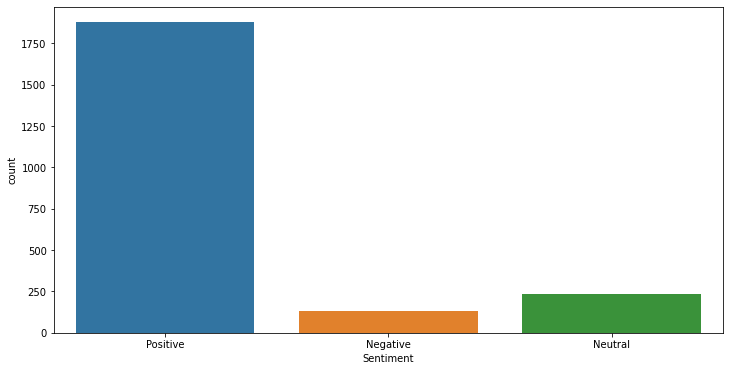

In [268]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=eth_df7)

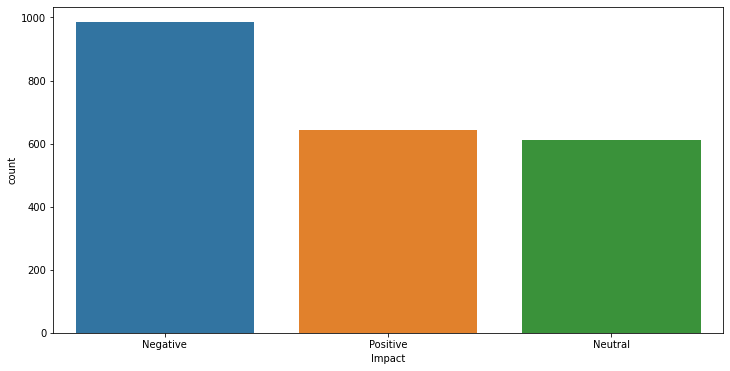

In [269]:
plt.figure(figsize=(12,6))
sns.countplot(x='Impact',data=eth_df7)

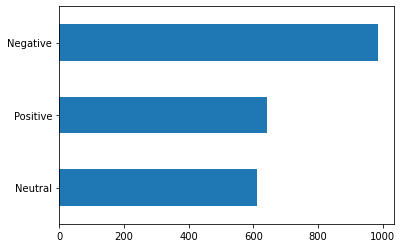

In [266]:
eth_df7.Impact.value_counts().sort_values().plot(kind = 'barh')

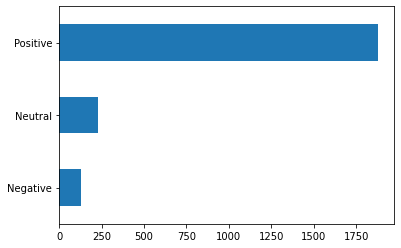

In [236]:
eth_df7.Sentiment.value_counts().sort_values().plot(kind = 'barh')

Creating a wordCloud

In [237]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [238]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = eth_df7

In [175]:
pos_mask = np.array(Image.open('/content/2.png'))
plot_wordcloud(eth_df7.tweets,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

IndexError: ignored

In [239]:
import wordcloud

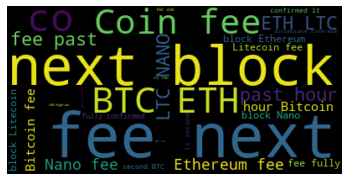

In [240]:
common_words=''
for i in eth_df7.tweets:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Model Building

In [241]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [253]:
X = eth_df7['tweets']
y = pd.get_dummies(eth_df7['Sentiment']).values
num_classes = eth_df7['Sentiment'].nunique()

In [254]:
seed = 38 
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1791,) (448,) (1791, 3) (448, 3)


In [255]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [256]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(1791, 30) (448, 30)


In [257]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

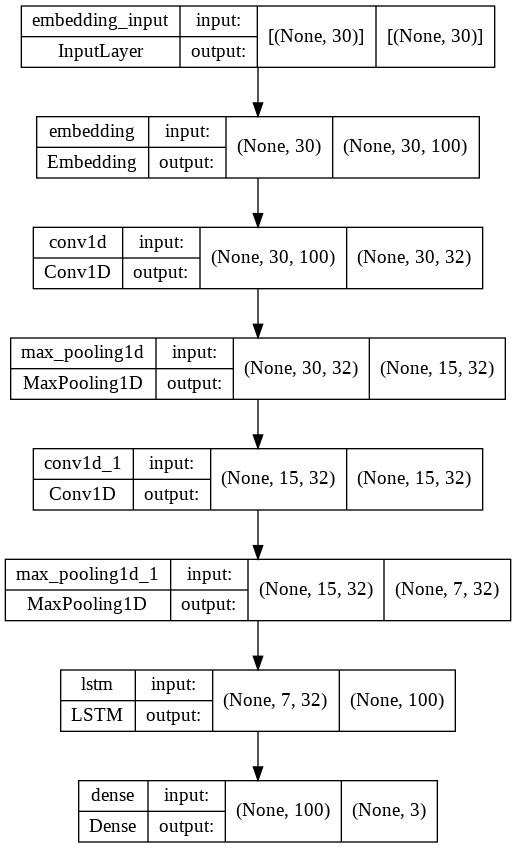

In [258]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [259]:
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history1=model.fit(X_train,y_train,epochs=10,batch_size=10,validation_data=(X_test,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/10
180/180 - 15s - loss: 0.3592 - accuracy: 0.8498 - val_loss: 0.2433 - val_accuracy: 0.9018 - 15s/epoch - 83ms/step
Epoch 2/10
180/180 - 7s - loss: 0.1857 - accuracy: 0.9280 - val_loss: 0.2071 - val_accuracy: 0.9286 - 7s/epoch - 39ms/step
Epoch 3/10
180/180 - 8s - loss: 0.0906 - accuracy: 0.9648 - val_loss: 0.2442 - val_accuracy: 0.9286 - 8s/epoch - 45ms/step
Epoch 4/10
180/180 - 8s - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.2682 - val_accuracy: 0.9107 - 8s/epoch - 42ms/step
Epoch 5/10
180/180 - 8s - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.2392 - val_accuracy: 0.9219 - 8s/epoch - 43ms/step
Epoch 5: early stopping


In [260]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
14/14 - 1s - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.2403 - val_accuracy: 0.9219 - 1s/epoch - 88ms/step
Epoch 2/10
14/14 - 1s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.9196 - 907ms/epoch - 65ms/step
Epoch 3/10
14/14 - 1s - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.2366 - val_accuracy: 0.9219 - 890ms/epoch - 64ms/step
Epoch 4/10
14/14 - 1s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2389 - val_accuracy: 0.9219 - 889ms/epoch - 64ms/step
Epoch 5/10
14/14 - 1s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2419 - val_accuracy: 0.9219 - 1s/epoch - 79ms/step
Epoch 6/10
14/14 - 1s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2443 - val_accuracy: 0.9219 - 1s/epoch - 82ms/step
Epoch 7/10
14/14 - 1s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.2467 - val_accuracy: 0.9219 - 1s/epoch - 82ms/step
Epoch 8/10
14/14 - 1s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.2482 - val_accuracy: 0.9219 - 1s/epoch - 80ms/step
Epoch 9/10
14/14 - 1s -

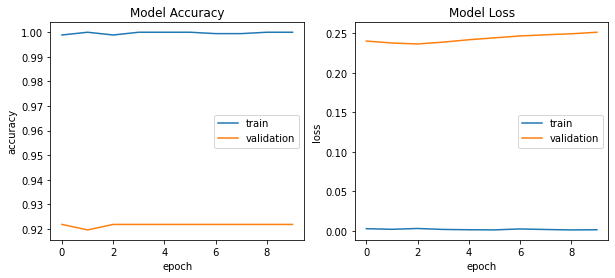

In [262]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    

    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    

plot_training_hist(history)

In [263]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	92.2%
              precision    recall  f1-score   support

           0       0.56      0.54      0.55        26
           1       0.75      0.83      0.78        46
           2       0.97      0.96      0.97       376

    accuracy                           0.92       448
   macro avg       0.76      0.77      0.77       448
weighted avg       0.92      0.92      0.92       448



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [189]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', eth_df7['tweets'][0])
X, tokenizer = tokenize_pad_sequences(eth_df7['tweets'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Developer Update Ethereum Core Developers Meeting Notes amp Video http co QhQyB R lI
After Tokenization & Padding 
 [1394  628  123  102  629  240  630    7  101    6    5 1395  857    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [201]:
y = pd.get_dummies(eth_df7['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (1343, 50) (1343, 3)
Validation Set:  (448, 50) (448, 3)
Test Set:  (448, 50) (448, 3)


In [202]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [204]:
vocab_size = 5000
embedding_size = 32
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

In [205]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

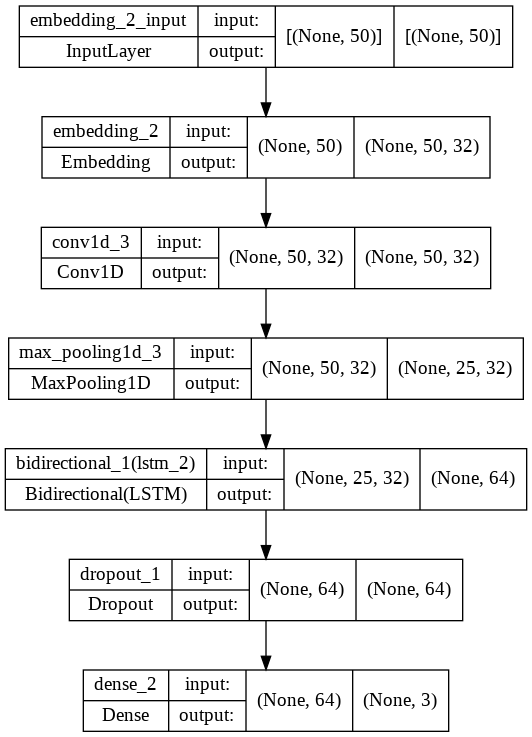

In [206]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [207]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [196]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/50
11/11 [==============================] - 6s 177ms/step - loss: 1.0927 - accuracy: 0.4051 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0729 - val_accuracy: 0.4821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 0s 42ms/step - loss: 1.0763 - accuracy: 0.4438 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0595 - val_accuracy: 0.4821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 0s 42ms/step - loss: 1.0728 - accuracy: 0.4438 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0554 - val_accuracy: 0.4821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 0s 45ms/step - loss: 1.0707 - accuracy: 0.4438 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0536 - val_accuracy: 0.4821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
11/11 [=========================

In [208]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [209]:
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history1=model.fit(X_train,y_train,epochs=10,batch_size=10,validation_data=(X_test,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/10
135/135 - 9s - loss: 0.5864 - accuracy: 0.8377 - precision_1: 0.8452 - recall_1: 0.7848 - val_loss: 0.5408 - val_accuracy: 0.8348 - val_precision_1: 0.8348 - val_recall_1: 0.8348 - 9s/epoch - 67ms/step
Epoch 2/10
135/135 - 2s - loss: 0.5182 - accuracy: 0.8444 - precision_1: 0.8444 - recall_1: 0.8444 - val_loss: 0.5005 - val_accuracy: 0.8348 - val_precision_1: 0.8348 - val_recall_1: 0.8348 - 2s/epoch - 17ms/step
Epoch 3/10
135/135 - 2s - loss: 0.4596 - accuracy: 0.8444 - precision_1: 0.8468 - recall_1: 0.8436 - val_loss: 0.3883 - val_accuracy: 0.8371 - val_precision_1: 0.8439 - val_recall_1: 0.8326 - 2s/epoch - 17ms/step
Epoch 4/10
135/135 - 2s - loss: 0.3909 - accuracy: 0.8541 - precision_1: 0.8787 - recall_1: 0.8250 - val_loss: 0.3482 - val_accuracy: 0.8571 - val_precision_1: 0.9116 - val_recall_1: 0.8058 - 2s/epoch - 17ms/step
Epoch 5/10
135/135 - 2s - loss: 0.3684 - accuracy: 0.8555 - precision_1: 0.8841 - recall_1: 0.8235 - val_loss: 0.3291 - val_accuracy: 0.8638 - val_p

In [210]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8817
Precision : 0.9041
Recall    : 0.8415
F1 Score  : 0.8717


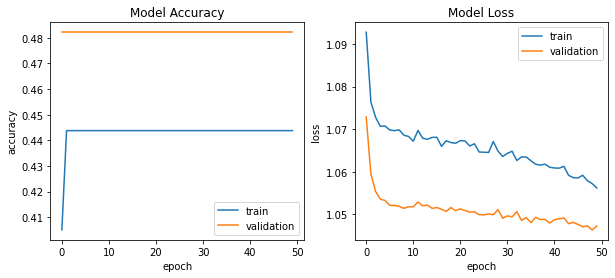

In [211]:
plot_training_hist(history)

2    117
1     28
0     20
dtype: int64
2    136
1     29
dtype: int64


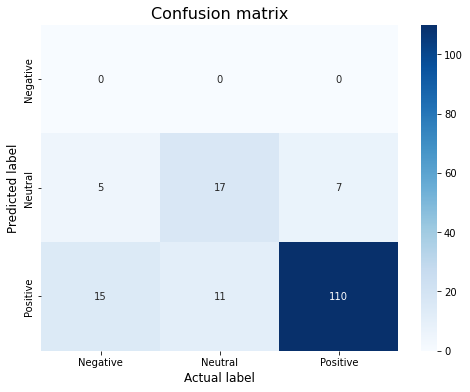

In [127]:
plot_confusion_matrix(model, X_test, y_test)

In [212]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(n_estimators= 100, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [213]:
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))



#rfc_f1 = round(f1_score(y_test, predictions, average = 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)



print("Accuracy : " , rfc_accuracy , " %")
#print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

           0       0.88      0.28      0.42        25
           1       0.67      0.61      0.64        49
           2       0.94      0.94      0.94       374

   micro avg       0.91      0.87      0.89       448
   macro avg       0.83      0.61      0.67       448
weighted avg       0.91      0.87      0.88       448
 samples avg       0.87      0.87      0.87       448

Accuracy :  86.83  %


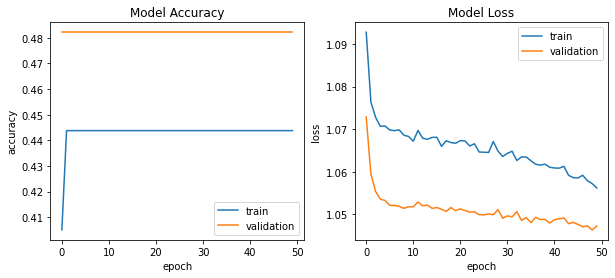

In [214]:
plot_training_hist(history)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
#Split data into training and testing sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =     train_test_split(eth_df7["tweets"], 
      eth_df7["Impact"], test_size = 0.2, random_state = 42)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)
#Output :(25569, 27304) (25569, 27304)
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)
#Output : (6393, 27304) (6393, 27304)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)
#Output: array([[5898,   39],        
#               [ 207,  249]], dtype=int64)
#f1-score
f1_score(y_test,predictions)
#Output : 0.6693548387096774
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100
# output:96.15204129516658